# Using sedonalib Python Tools 

To add python tools to your python path, for now can set

```export PYTHONPATH=$PYTHONPATH:$SEDONA_HOME/tools/sedonalib```

## Creating an input modelfile using sedonalib  

In [1]:
import sedonalib as sed
import matplotlib.pyplot as plt


# model parameters
mass = 1.99e33
KE   = 1e51
day  = 60.0*60.0*24.0

# Define a new 1D spherical model with 100 zone
mod = sed.new_model("1D_sphere",dims=100)

# Set a homologous density structure 
mod.set_homologous_profile(mass,KE,"powerlaw",time=day)

# Add a constant composition and temperature 
mod.add_elements(["14.28","28.56"])
mod.set_constant_composition([0.5,0.5])
mod.set_constant_temperature(10000.0)

# Write to a file
mod.write("testmodel.mod")
print(mod)


ModuleNotFoundError: No module named 'plt'

## Creating a parameter file with sedonalib

In [3]:
param = sed.new_paramfile()
param.set_template()
print param


Available parameter templates are: 
0) kilonova/2D_grey_kilonova_lightcurve
1) kilonova/1D_kilonova_spectrum_core
2) kilonova/3D_grey_kilonova_lightcurve
3) kilonova/1D_grey_kilonova_lightcurve
4) kilonova/2D_kilonova_lightcurve
5) kilonova/1D_kilonova_spectrum
6) supernova/1D_typeIa_supernova_lightcurve
7) supernova/1D_grey_supernova_lightcurve
8) supernova/3D_grey_supernova_lightcurve
choose template number >6
----------------------------------
days                                = 3600.0*24
sedona_home                         = os.getenv('SEDONA_HOME')
----------------------------------
--
data_atomic_file                    = sedona_home.."/data/cmfgen_levelcap100.hdf5"
--
hydro_module                        = "homologous"
--
model_file                          = "mymodel.h5"
--
opacity_electron_scattering         = 1
opacity_epsilon                     = 1
opacity_line_expansion              = 1
--
particles_n_emit_radioactive        = 1e4
--
spectrum_nu_grid                    =

We can change some of the parameters. 
Then we write out the parameter file

In [6]:
days = 3600.0*24.0

param["opacity_grey_opacity"]         = 0.00001
param["particles_n_emit_radioactive"] = 1e2
param["model_file"]                   = "testmodel.mod"
param["tstep_time_start"]             = 2*days
param["tstep_time_stop"]              = 30*days
param["output_plt_file_time"]   = days

print param
param.write("myparam.lua")

ValueError: output_plt_file_time is not a valid Sedona parameter
Did you mean one of: 
> output_write_plt_file_time
> output_write_plt_log_space


## Run the code

In [5]:
import os
os.system("mpirun -np 2 ./sedona6.ex myparam.lua")

32512

## Read and plot up results

ValueError: x and y can be no greater than 2-D, but have shapes (201,) and (201, 1, 1)

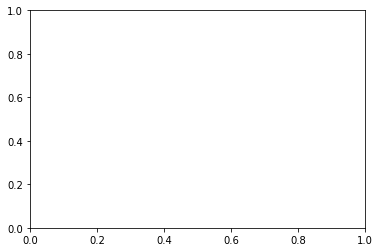

In [3]:
import matplotlib.pyplot as plt

spectrum = sed.read_spectrum("spectrum_final.h5")
t,L = spectrum.get_bolometric_lc()
plt.plot(t,L)
plt.show()